In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.api import Holt


import prepare as pr 

In [2]:
df = pd.read_csv('saas.csv')


# Prep

In [3]:
# Lowercase column names
df.columns = [col.lower() for col in df]

In [4]:
# Create Datetime field
df.month_invoiced = pd.to_datetime(df.month_invoiced)

# Data Type Prep

In [5]:
df.subscription_type = df.subscription_type.astype(int)

In [6]:
df.subscription_type = df.amount.astype(int)

# DateTime

In [7]:
# a datetime index is probably a good idea for time series analysis
df = df.set_index('month_invoiced')

In [8]:
df = df.resample('M')[['amount']].sum()

# Split Data

In [9]:
# set train size to be 50% of total 
train_size = int(len(df) * 0.5)
# set validate size to be 30% of total 
validate_size = int(len(df) * 0.3)
# set test size to be number of rows remaining. 
test_size = int(len(df) - train_size - validate_size)

In [10]:
# set end for validate
validate_end_index = train_size + validate_size
validate_end_index

38

In [11]:
# train will go from 0 to 23
train = df[:train_size]

In [12]:
train.head()

,amount
month_invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0


In [13]:
# validate will go from 24 to 37
validate = df[train_size:validate_end_index]

In [14]:
validate.head()

,amount
month_invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0


In [15]:
# test will include 38 to the end
test = df[validate_end_index:]

In [16]:
test.head()

,amount
month_invoiced,
2017-03-31,53480.0
2017-04-30,53350.0
2017-05-31,53340.0
2017-06-30,53405.0
2017-07-31,53680.0


# function

In [17]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [18]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var], label=target_var)
    plt.title(target_var)
    plt.legend()
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [19]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [20]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# Last observed Value

In [21]:
# take the last item of amount and assign to variable
amount = train['amount'][-1:][0]
amount

51505.0

In [22]:
yhat_df = pd.DataFrame(
    {'amount': [amount]},
    index=validate.index)

yhat_df.head(15)

,amount
month_invoiced,
2016-01-31,51505.0
2016-02-29,51505.0
2016-03-31,51505.0
2016-04-30,51505.0
2016-05-31,51505.0
2016-06-30,51505.0
2016-07-31,51505.0
2016-08-31,51505.0
2016-09-30,51505.0


amount -- RMSE: 1343


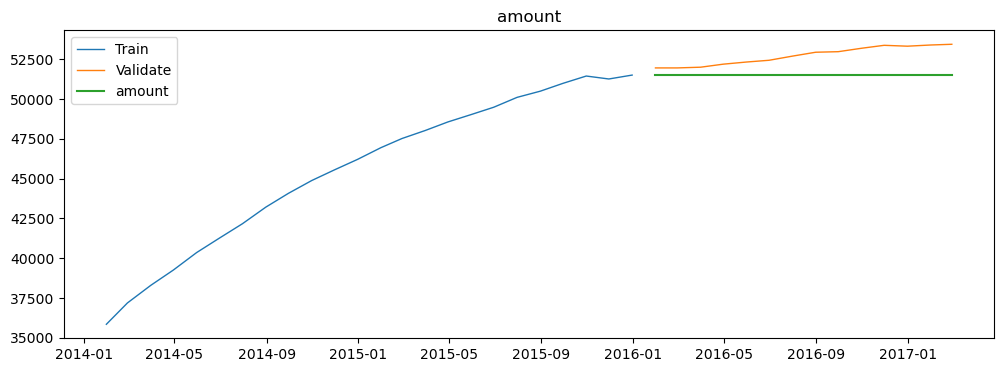

In [23]:
plot_and_eval('amount')

# Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

## Simple Average

#### making predictions

In [24]:
# compute average
amount = round(train['amount'].mean(), 2)
amount

45568.54

In [25]:
def make_predictions(amount=None):
    yhat_df = pd.DataFrame({'amount': [amount]},
                          index=validate.index)
    return yhat_df

In [26]:
yhat_df = make_predictions(amount)
yhat_df.head()

,amount
month_invoiced,
2016-01-31,45568.54
2016-02-29,45568.54
2016-03-31,45568.54
2016-04-30,45568.54
2016-05-31,45568.54


In [27]:
3for col in train.columns:
    plot_and_eval(col)

SyntaxError: invalid syntax (3521306732.py, line 1)

In [ ]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)


In [ ]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)



In [ ]:
eval_df


## Moving Average

## Moving Average

## Holt's Linear Trend Model

## Holt's Linear Trend Model

## Based on previous year/month/etc., this is up to you.

In [ ]:
# dfs = df.sample(10000)

# clean

In [ ]:
dfs.Month_Invoiced = pd.to_datetime(dfs.Month_Invoiced)

In [ ]:
dfs.rename(columns={"Month_Invoiced":"date"},inplace= True)

In [ ]:
dfs.head(1)

In [ ]:
dfs.shape

In [ ]:
# dfs.nunique(Invoice_Id)

In [ ]:
dfs.Subscription_Type.value_counts()

In [ ]:
dfs.Amount.value_counts() 

In [ ]:
dfs = dfs.set_index('date')

In [ ]:
print('Date Range:', dfs.index.min(), 'to', dfs.index.max())
print('Shape:', dfs.shape)



In [ ]:
dfs = dfs.fillna(0)

# end clean

# Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.

In [ ]:
train_size = int(len(dfs) * .5)
validate_size = int(len(dfs) * .3)
test_size = int(len(dfs) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = dfs[: train_size]
validate = dfs[train_size : validate_end_index]
test = dfs[validate_end_index : ]

# visualize the split

In [ ]:
train.shape,validate.shape,test.shape

In [ ]:

plt.plot(train.index, train.Amount)
plt.plot(validate.index, validate.Amount)
plt.plot(test.index, test.Amount)

In [ ]:
plt.plot(train.index, train.Subscription_Type)
plt.plot(validate.index, validate.Subscription_Type)
plt.plot(test.index, test.Subscription_Type)

# resample

In [ ]:
y = train.resample('D').Amount.mean()
y.head()

In [ ]:
# Plot the M average & the 7-day moving average. Compare the 2 plots.
y.resample('M').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
y.resample('M').mean().rolling(3).mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')

plt.legend()

# functions that might help

In [ ]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [ ]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [ ]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# make predictions

In [ ]:
subt = train['Subscription_Type'][-1:][0]

In [ ]:
amnt = train['Amount'][-1:][0]

In [ ]:
yhat_df = pd.DataFrame({'Subscription_Type': [subt], 'amount': [amnt]}, 
                       index = validate.index)


In [ ]:
yhat_df.head()

In [ ]:
 plot_and_eval(col)

# Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

# Simple Average

# Moving Average

# Holt's Linear Trend Model

# Based on previous year/month/etc., this is up to you.